# Prática de IA: Treinamento de modelo

## Netflix: Series and Movies

O objetivo nessa prática é apresentar o workflow básico pra criação de um modelo inteligente para solucionar um problema de classificação. Desta forma, vamos realizar, passo a passo, as quatro principais etapas do processo: Extração de atributos, Divisão dos dados, Treinamento do modelo e Avaliação do modelo.

In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Carregar e entender os dados

# biblioteca para carregar e realizar operações tabulares
import pandas as pd

# biblioteca para plotar gráficos
import matplotlib.pyplot as plt 


# dataset, arquivo com os dados sobre a covid19 nas cisdades do BR
arquivo  = 'heart.csv'

# carregando o conteúdo do arquivo em um objeto pandas.DataFrame
# a partir do método de carregamento de arquivo read_excel
# o parâmetro header=0 indica que a primeira linha do arquivo contém os nomes das col
# especificando que a primeira linha contém os nomes do cabeçalho
dataset = pd.read_csv(arquivo, header=0)


# exibindo a dimensão dos dados carregados (linhas, colunas)
dataset.shape

(918, 12)

In [134]:
# exibindo as 10 primeiras linhas de valores contidos no dataset
dataset.head(10)
# exibindo os 10 últimas linhas de valores do dataset
#dataset.tail(10)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
6              N      0.0       Up             0  
7              N      0.0       Up             0  
8              Y      1.5     Flat             1  
9              N      0.0       Up             0

In [135]:
# para acesssar uma linha aleatória
dataset.iloc[23] #linha especifica
dataset.sample() #linha aleatoria

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
700   42   M            TA        148          244          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
700    178              N      0.8       Up             0

In [136]:
#verificando os tipos de dados de cada coluna
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
dataset["Sex"].value_counts()
#Variáveis categóricas como Sex estão desbalanceadas: 725 homens e 193 mulheres


Sex
M    725
F    193
Name: count, dtype: int64

In [ ]:
# para obter um resumo estatístico dos dados
dataset.describe()
# varia entre 28 e 77 anos, com média de 54 anos 

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [ ]:
dataset["HeartDisease"].value_counts(normalize=True)
#classe heart disease está desbalanceada: 0.55 (doente) e 0.45 (não doente)


HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

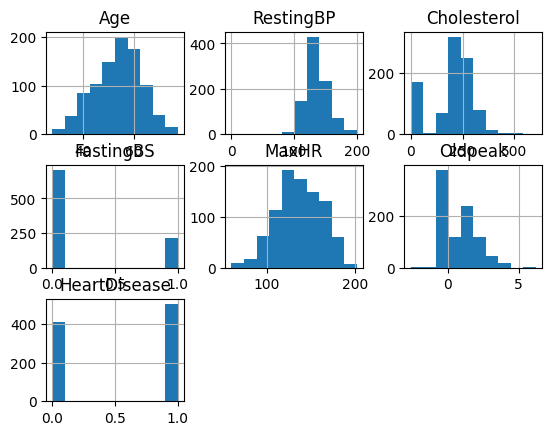

In [148]:
dataset.hist()
plt.show()

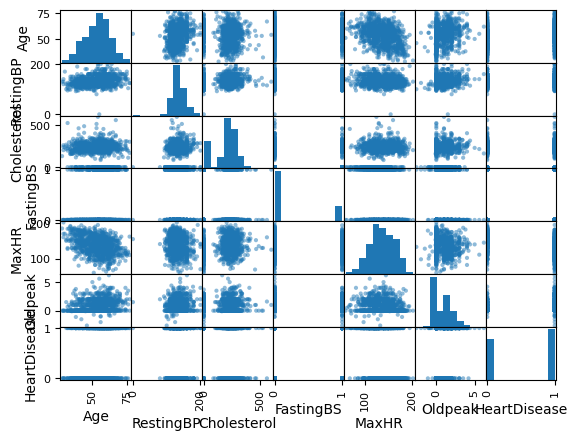

In [149]:
# gráfico tipo 'scatter plot' para verificar correlações entre as variáveis
pd.plotting.scatter_matrix(dataset)
plt.show()


<Axes: xlabel='HeartDisease', ylabel='Age'>

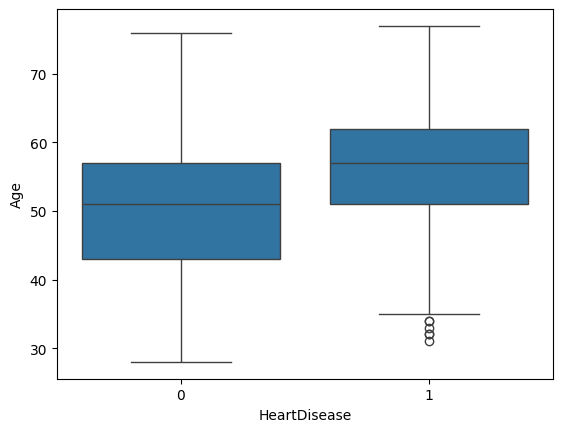

In [ ]:
import seaborn as sns

sns.boxplot(x="HeartDisease", y="Age", data=dataset)
#Spacientes com doença tendem a ter idade maior


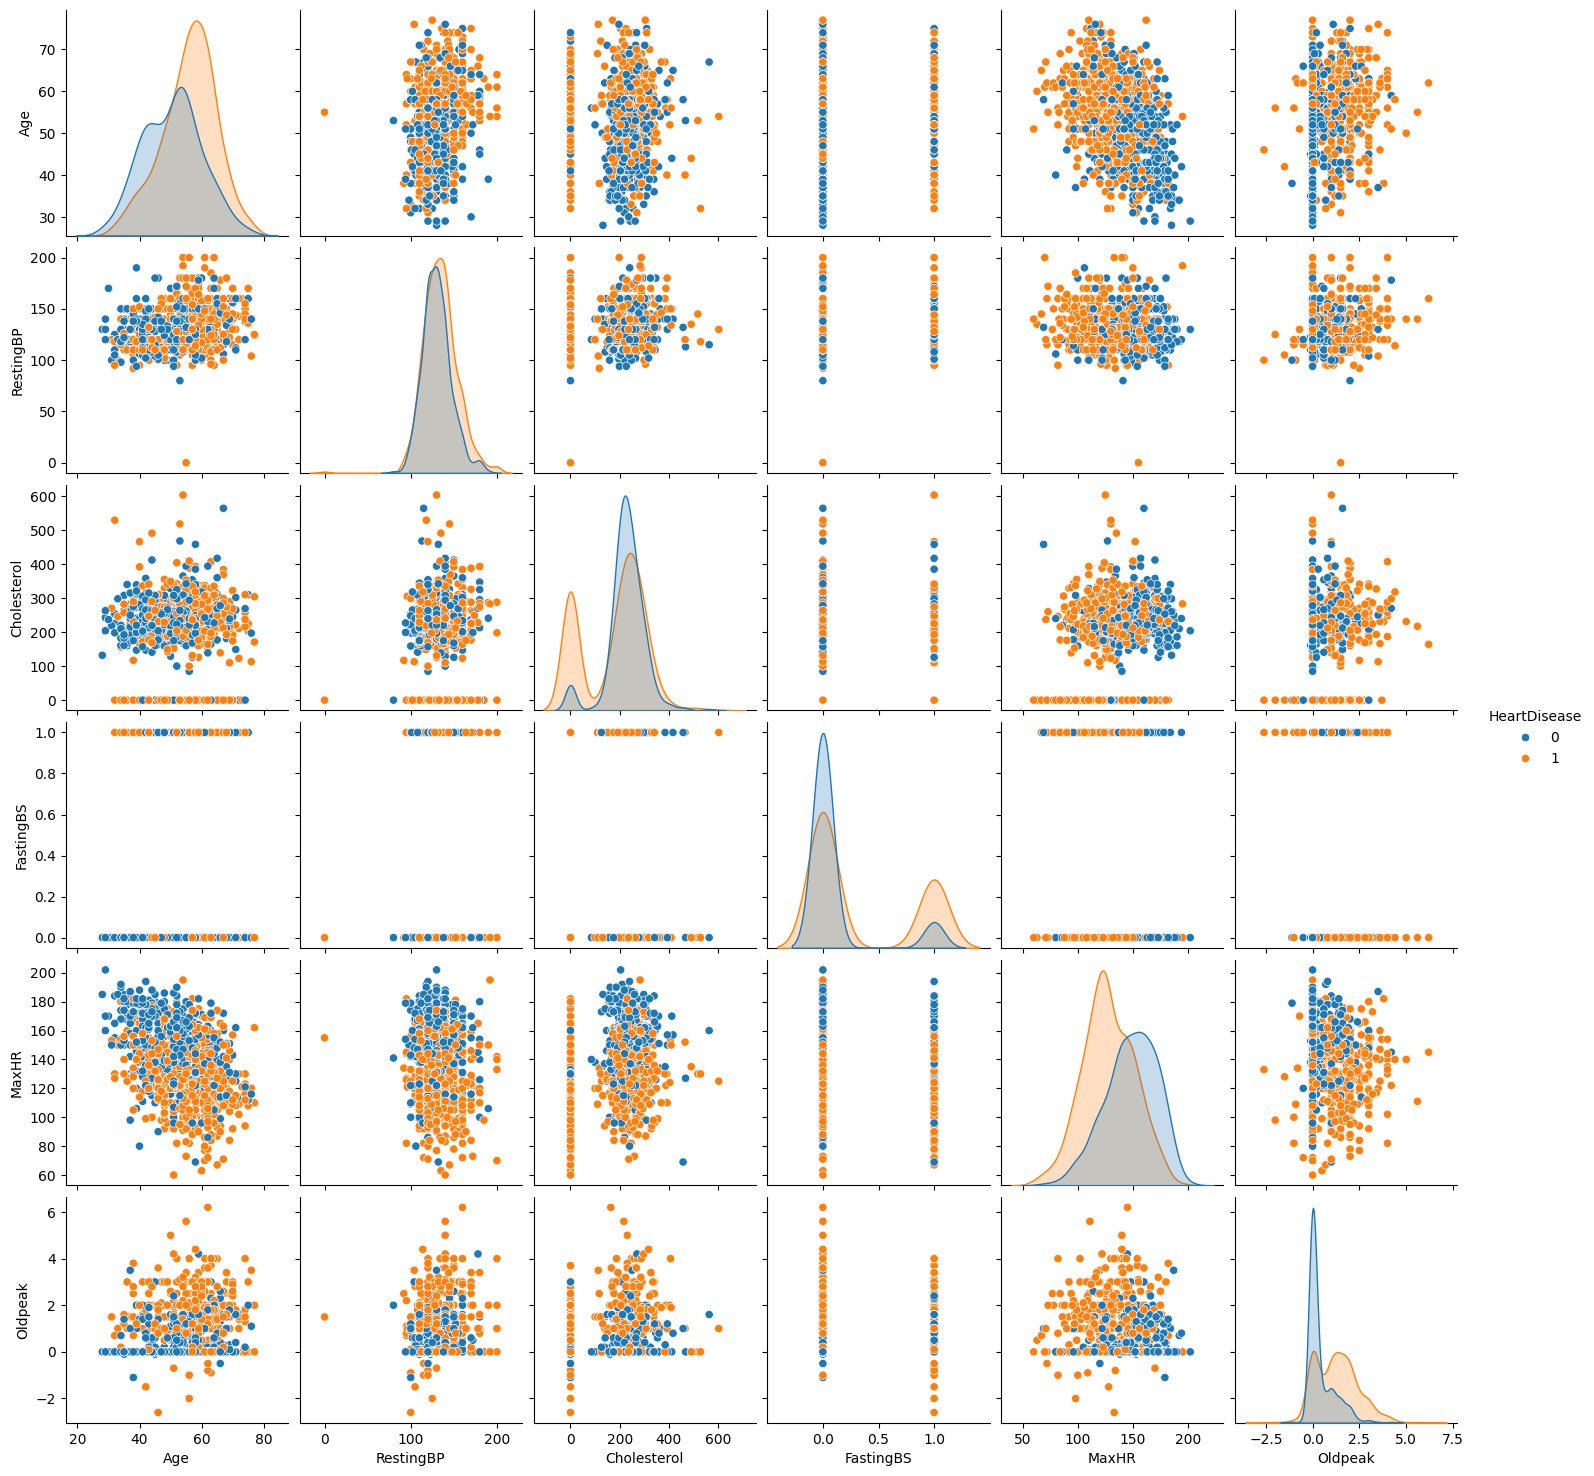

In [ ]:
sns.pairplot(dataset, hue="HeartDisease")
# sns.pairplot(dataset, hue="HeartDisease") # para verificar correlações entre as variáveis


<Axes: xlabel='Sex', ylabel='count'>

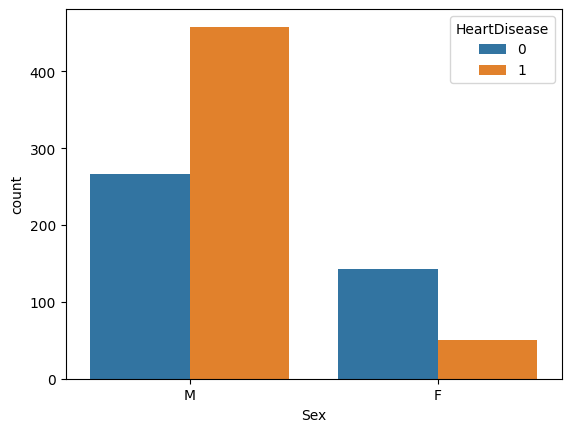

In [ ]:
sns.countplot(x="Sex", hue="HeartDisease", data=dataset)
#homens apresentam mais casos de doença

In [163]:
#limpeza dos dados
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(dataset.select_dtypes(include=['float64', 'int64']))


VarianceThreshold(threshold=0.01)

# 2 - Divisão dos dados

Criando dois conjuntos de dados para serem utilizados nas etapas seguintes, treinamento e avaliação.

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/03_divisao_dados.jpg", width="640"/>
</div>

In [165]:

# carregando uma função pertencente ao scikit-learn para realizar
# automaticamente uma amostragem sem reposição aleatória e dividir
# os dados em dois conjuntos
from sklearn.model_selection import train_test_split

# importante lembrar que as 4 primeiras colunas são o nosso 'X'
# ou seja, os dados de entrada do modelo, e que a última coluna
# é o nosso 'y', ou seja, o dado que o modelo deve aprender a predizer
print('exemplo de entrada (x):\n', dataset.iloc[4, :8])
print('exemplo de saída (y):\n', dataset.iloc[4, 8])

exemplo de entrada (x):
 Age                  54
Sex                   M
ChestPainType       NAP
RestingBP           150
Cholesterol         195
FastingBS             0
RestingECG       Normal
MaxHR               122
Name: 4, dtype: object
exemplo de saída (y):
 N


In [166]:

from sklearn.preprocessing import LabelEncoder
# criando os dados de entrada e saída para treinamento e validação
# usando o método 'values' ele retorna um array bidimensional
# para serem inseridos na função train_test_split
array = dataset.values
print(type(array))

X = array[:, 3:8]
le = LabelEncoder()
y = le.fit_transform(array[:, 1])

print("dimensoes de X", X.shape)
print("dimensoes de y", y.shape)

<class 'numpy.ndarray'>
dimensoes de X (918, 5)
dimensoes de y (918,)


In [167]:

# utilizando um critério de divisão percentual 20% na função train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# olhando alguns dados referentes aos conjuntos
print(f'\n dimensao de X_train {X_train.shape} e y_train {y_train.shape}')
print(f'\n dimensao de X_test {X_test.shape} e y_train {y_test.shape}')


 dimensao de X_train (734, 5) e y_train (734,)

 dimensao de X_test (184, 5) e y_train (184,)


In [168]:

# Exemplo: dataframe com coluna "label" que indica a classe
print(dataset['state'].value_counts())
print(dataset['state'].value_counts(normalize=True))  # porcentagem


KeyError: 'state'

# 3 - Treinamento do Modelo

Definindo um modelo e realizando o treinamento

<div>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/04_treinamento_modelo.jpg", width="640"/>
</div>

In [159]:
# carregando a classe pra criar um modelo do scikit-learn
from sklearn.svm import SVC

# instanciando um objeto do modelo SVC com parâmetros padrões
model = SVC(gamma='auto')


In [171]:
model.fit(X_train, y_train)  # treinando o modelo com os dados de entrada e saída

ValueError: could not convert string to float: 'LVH'

In [162]:
# executa o método, a partir de um de treinamento 'fit', para ajustar os parâmetros
# do modelo algoritmo de aprendizagem, em função
# dos valores contidos no conjunto de dados
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# realizando as predições utilizando o conjunto de testes
prediction = model.predict(X_test)


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [70]:
model.fit(X_train, y_train)


SVC(gamma='auto')

# 4 - Avaliação do Modelo

Utilizando o conjunto de dados de teste define-se uma métrica estatística de
avaliação e deduz-se a qualidade do resultado do treinamento

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/05_avaliacao_modelo.jpg", width="640"/>
<div/>

In [71]:
# carregando funções da biblioteca scikit-learn que auxiliam no cálculo
# das avaliações dos modelos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# realizando as predições utilizando o conjunto de testes
prediction = model.predict(X_test)


In [72]:
# para efeitos de comparação e devido ao fato do conjunto ser pequeno
# podemos observar visualmente o resultdo da predição e o valor real do dataset
print("Valores preditos:\n", prediction)
print("Valores esperado:\n", y_test)
print("Comparativo:\n", y_test == prediction)


Valores preditos:
 [19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 1

In [73]:
# usando funções e métricas mais robustas para avaliar o desempenho
# exibindo a acurácia do modelo para este treinamento
print("Acurácio do modelo:\n", accuracy_score(y_test, prediction))

Acurácio do modelo:
 0.1572769953051643


In [ ]:
# exibindo a matrix confusão VP, FP, VN FN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#
#cm = confusion_matrix(y_test, prediction)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot(cmap='Blues')
#plt.title('Matriz de Confusão')
#plt.bar(range(26), 'totalCases')
#plt.xticks(range(26), 'city')
#plt.show()

KeyboardInterrupt: 

In [ ]:
# exibindo um relatório mais completo com os índices:
# precisão, recall, f1-score e support


## Qual conclusão podemos tirar do processo de treinamento?

E se, por exemplo, tivéssemos usado outros valores para divisão dos dados?

In [ ]:
# para avaliar o que aconteceria se tivéssemos utilizado outra propoção de dados
# para treino e validação podemos refazer parte do procedimento

# Cria novamente o modelo, treina, prediz e avalia
